# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 2

Load the dlib face predictor.

In [30]:
import dlib

# Initialize detector
detector = dlib.get_frontal_face_detector()
img = cv2.imread('data/p2.jpg')


# Read image
def img_load(href):
    img = cv2.imread(href)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

imgs = [img_load('data/p2.jpg'),img_load('data/p3.jpg'),img_load('data/p4.jpg')]
    

### Step 3

Run the predictor on your image.

In [31]:
rects = [detector(x, 1) for x in imgs]
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

3


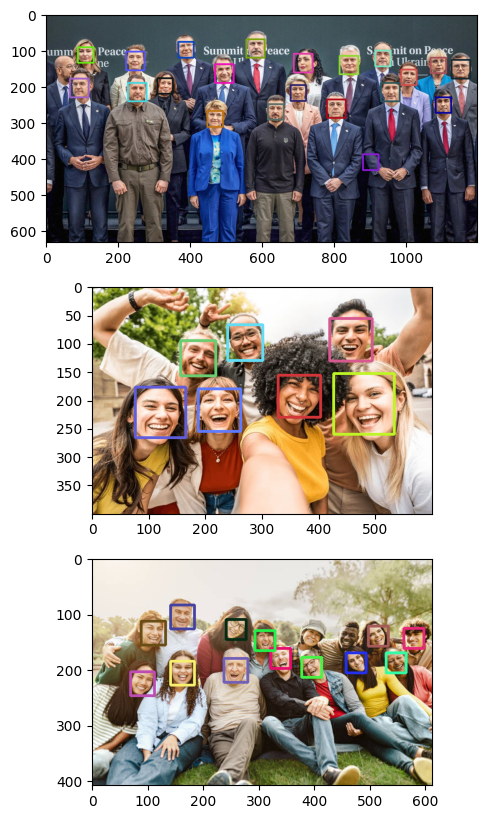

In [50]:
import random

def rect_on_img(img,rects):
    result = np.copy(img)
    faces_img = []

    for rect in rects: 
        (x, y, w, h)=rect_to_bb(rect)
        # Draw rectangle around the face
        r=random.randint(0,255)
        g=random.randint(0,255)
        b=random.randint(0,255)
        cv2.rectangle(result, (x, y), (x+w, y+h), (r, g, b), 3)
        
        faces_img.append(img[y:y+h, x:x+w, :])
        
    return result

results=[]
for i in range(len(imgs)):
    results.append(rect_on_img(imgs[i],rects[i]))



i=1
count=len(results)
print(count)
for r in results:   
    plt.subplot(count*100+1*10+i), plt.imshow(r, cmap='gray')
    i+=1


### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?  Has problems with the dark skin of the face and the face under the hat, but good result to different faces inclines